In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
df = pd.read_csv("HR_comma_sep.csv")
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [65]:
columns_to_drop = ["last_evaluation", "Work_accident"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [66]:
label_encoder = LabelEncoder()
encoded_salary = label_encoder.fit_transform(df["salary"])
df["salary"] = encoded_salary

In [67]:
label_encoder = LabelEncoder()
encoded_Department = label_encoder.fit_transform(df["Department"])
df["Department"] = encoded_salary
df.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,2,157,3,1,0,1,1
1,0.80,5,262,6,1,0,2,2
2,0.11,7,272,4,1,0,2,2
3,0.72,5,223,5,1,0,1,1
4,0.37,2,159,3,1,0,1,1


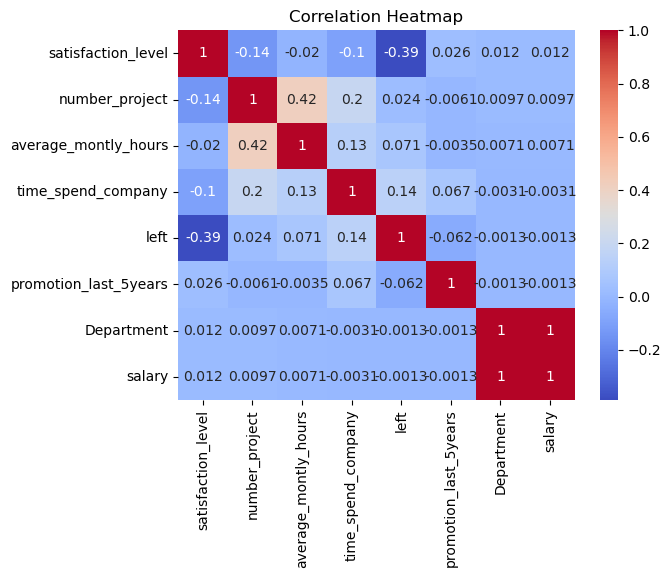

In [68]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [69]:
y = df["left"]
X = df.drop("left" , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred = model.predict(X_test)

accuracy = model.score(X_test , y_test)
accuracy

0.754